<a href="https://colab.research.google.com/github/janedewes/Py-MachineLearning/blob/master/pima_indians_diabetesVfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Probelma
2. Preparação dos dados
3. Seleção do Algoritmo 
4. Treinamento do modelo 
5. Teste e avaliação do modelo  


Dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [1]:
# Importar pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [57]:
# Carregar arquivos no colab
from google.colab import files
uploaded = files.upload()

Saving ConfusionMatrix.jpg to ConfusionMatrix.jpg


In [3]:
# Realizar a carga dos dados 
df = pd.read_csv('pima-indians-diabetes.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# verificando o formato dos dados 
df.shape

(767, 9)

In [6]:
# Verificando as primeiras linhas do dataset
df.head(5)

#OBS
# 1ª col) indice
# 2ª a 8ª col) variaveis preditoras
# 9ª col) variavel target

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
# verificando as últimas linhas do dataset
df.tail(5)

,6,148,72,35,0,33.6,0.627,50,1
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# Alterando o título das colunas
df = pd.read_csv('pima-indians-diabetes.csv', names = ['num_grav', 'glicose', 'press_diastolica', 'espessura_triceps', 'insulina', 'IMC', 'hist_diabetes', 'idade', 'classificacao'])
df

,num_grav,glicose,press_diastolica,espessura_triceps,insulina,IMC,hist_diabetes,idade,classificacao
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Tipos de dados no dataset
df.dtypes

num_grav               int64
glicose                int64
press_diastolica       int64
espessura_triceps      int64
insulina               int64
IMC                  float64
hist_diabetes        float64
idade                  int64
classificacao          int64
dtype: object

In [10]:
# Média de idade dos pacientes que que são diabéticos
df.groupby(by='classificacao')['idade'].mean()

classificacao
0    31.190000
1    37.067164
Name: idade, dtype: float64

In [11]:

df.groupby(by='classificacao')['num_grav'].count()

classificacao
0    500
1    268
Name: num_grav, dtype: int64

In [13]:
# informações estatísticas
df.describe()

,num_grav,glicose,press_diastolica,espessura_triceps,insulina,IMC,hist_diabetes,idade,classificacao
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# Número de registro igual a 0 em cada coluna:
(df[['num_grav','glicose','press_diastolica','espessura_triceps','insulina','IMC', 'hist_diabetes', 'idade', 'classificacao']] == 0).sum()


num_grav             111
glicose                5
press_diastolica      35
espessura_triceps    227
insulina             374
IMC                   11
hist_diabetes          0
idade                  0
classificacao        500
dtype: int64

In [15]:
# Verificando se existem valores nulos
df.isnull().values.any()

False

In [16]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

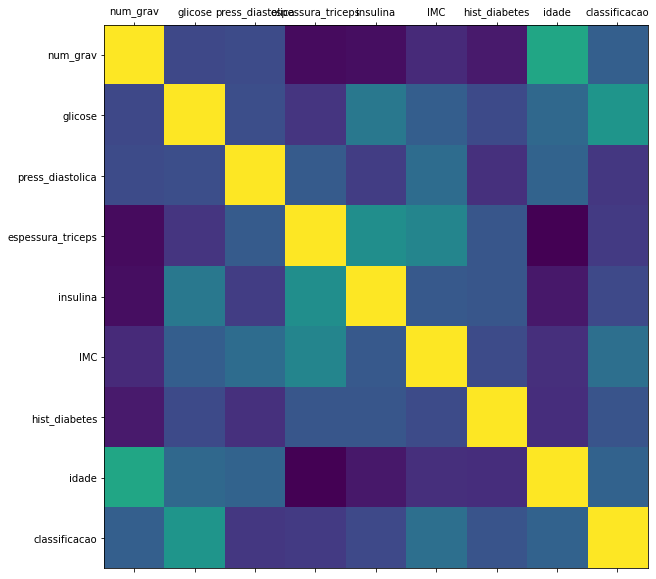

In [17]:
# Criando o gráfico - saber quais as variáveis mais relevantes para construir o modelo
plot_corr(df)

In [18]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df.corr()

# analise:
# OBS: Saber quais as variaveis mais relevantes p construir o modelo preditivo 
#  o que interessa é saber a relação de cada variavel com as outras.

# abaixo a tabela é igual ao grafico, porem com as correlações ja calculadas

,num_grav,glicose,press_diastolica,espessura_triceps,insulina,IMC,hist_diabetes,idade,classificacao
num_grav,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glicose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
press_diastolica,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
espessura_triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
hist_diabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
idade,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
classificacao,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
# Definindo as classes 
# OBS: para se a var target tivesse valores string (que não é o caso, ela já está com valores númericos!)
# pois os modelos de ML só entendem valores numéricos, não valores texto.
classificacao_map = {True : 1, False : 0}

In [20]:
# Aplicando o mapeamento ao dataset
df['classificacao'] = df['classificacao'].map(classificacao_map)

In [21]:
# Verificando as primeiras linhas do dataset (se houvesse necessidade de alteração)
df.head(5)

,num_grav,glicose,press_diastolica,espessura_triceps,insulina,IMC,hist_diabetes,idade,classificacao
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
# Verificando como os dados estão distribuídos 
num_true = len(df.loc[df['classificacao'] == True])
num_false = len(df.loc[df['classificacao'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


OBS: o ideal é balancear o dataset (50% e 50%)

Spliting

70% para dados de treino e 30% para dados de teste

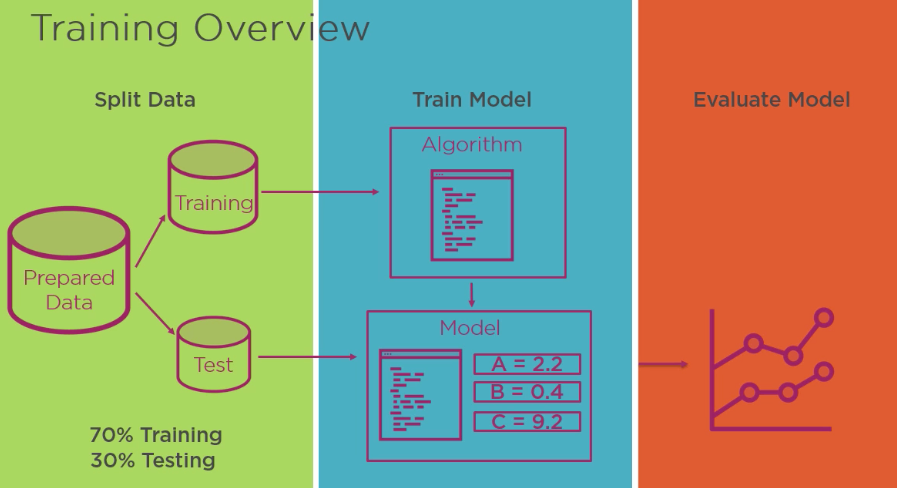

In [58]:
# Imagem para demonstrar o processo
from IPython.display import Image
Image('Treinamento.png')

In [23]:
# importar scikit-learn
import sklearn as sk
sk.__version__

'0.22.2.post1'

In [24]:
# importar biblioteca que fará a divisão
from sklearn.model_selection import train_test_split

In [25]:
# Seleção de variáveis preditoras (Feature Selection = é uma técnica para selecionar as melhores variáveis)
# OBS: existe um modelo de ML para escolher as melhores variáveis.
# OBS: escolher as variaveis mais relevantes para o modelo (pode usar todas, sim)
atributos = ['num_grav', 'glicose', 'press_diastolica', 'espessura_triceps', 'insulina', 'IMC', 'hist_diabetes', 'idade']

In [26]:
# Variável (target) a ser prevista
atrib_prev = ['classificacao']

In [27]:
# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [28]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [59]:
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [30]:
 # Definindo a taxa de split
split_test_size = 0.30

In [31]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [32]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


In [33]:
X_treino

array([[  1.   ,  95.   ,  60.   , ...,  23.9  ,   0.26 ,  22.   ],
       [  5.   , 105.   ,  72.   , ...,  36.9  ,   0.159,  28.   ],
       [  0.   , 135.   ,  68.   , ...,  42.3  ,   0.365,  24.   ],
       ...,
       [ 10.   , 101.   ,  86.   , ...,  45.6  ,   1.136,  38.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ],
       [  0.   , 125.   ,  96.   , ...,  22.5  ,   0.262,  21.   ]])

Verificando o split

In [34]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['classificacao'] == 1]), 
                                               (len(df.loc[df['classificacao'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['classificacao'] == 0]), 
                                               (len(df.loc[df['classificacao'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


OBS: o ideal é que a divisão de treino e teste siga a mesma proporção do dataset original.
Por ex: 30% e 70%

In [35]:
# Novamente verificar a existencia de valores nulos
df.isnull().values.any()

False

In [36]:
df.head(5)

,num_grav,glicose,press_diastolica,espessura_triceps,insulina,IMC,hist_diabetes,idade,classificacao
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
# Verificar a quantidade de zeros nas linhas (são valores missing ocultos)

# Zero não é valor missing, missing é valor faltante, zero geralmente significa que não tinha o dado. 

print("# Linhas no dataframe {0}".format(len(df))) # todas as linhas do dataset
print("# Linhas missing num_grav {0}".format(len(df.loc[df['num_grav'] == 0])))
print("# Linhas missing glicose: {0}".format(len(df.loc[df['glicose'] == 0])))
print("# Linhas missing press_diastolica: {0}".format(len(df.loc[df['press_diastolica'] == 0])))
print("# Linhas missing espessura_triceps: {0}".format(len(df.loc[df['espessura_triceps'] == 0])))
print("# Linhas missing insulina: {0}".format(len(df.loc[df['insulina'] == 0])))
print("# Linhas missing IMC: {0}".format(len(df.loc[df['IMC'] == 0])))
print("# Linhas missing idade: {0}".format(len(df.loc[df['idade'] == 0])))

# Linhas no dataframe 768
# Linhas missing num_grav 111
# Linhas missing glicose: 5
# Linhas missing press_diastolica: 35
# Linhas missing espessura_triceps: 227
# Linhas missing insulina: 374
# Linhas missing IMC: 11
# Linhas missing idade: 0


PARA RESOLVER OS VALORES MISSING OCULTOS

Tratando Dados Missing - Impute

Substituindo os valores iguais a zero, pela média dos dados

In [40]:
#importando as bibliotecas 
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

Construindo e treinando o modelo

 ## 1. Algoritmo (GaussianNB) Naive Bayes ********************

In [44]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [45]:
# Criando o modelo preditivo - é um modelo de classificação baseado no teorema de Bayes (teorema probabilístico)
modelo_v1 = GaussianNB() # instanciar o objeto

In [49]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel()) # ravel = ajustar o shape do objeto

GaussianNB(priors=None, var_smoothing=1e-09)

Verificando a exatidão no modelo nos dados de *TREINO*

In [ ]:
# Verificar a acurácia
from sklearn import metrics

In [55]:
# Treino 
nb_predict_train = modelo_v1.predict(X_treino) # passar apenas os valores de entrada (preditoras)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train))) # acurácia = comparar dados históricos(usados para treinar o modelo) com as previsões do modelo
print()

Exatidão (Accuracy): 0.7542



Verificando a exatidão no modelo nos dados de *TESTE*

In [54]:
# Teste - O IDEAL É FAZER O TESTE DE ACURÁCIA NOS DADS DE TESTE!!
nb_predict_test = modelo_v1.predict(X_teste)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

# OBS: os dados de teste são dados que o modelo não viu anteriormente, são completamente novos. 
# Já os dados de treino o modelo já conhece. Por isso os dados de teste são melhores para medir a acurácia. 
# Ou seja, a acurácia é comparar as saídas esperadas(já sabemos quais são) e as saídas previstas pelo modelo. 

Exatidão (Accuracy): 0.7359



Métricas 

Ajudam a fazer a leitura da acurácia do modelo

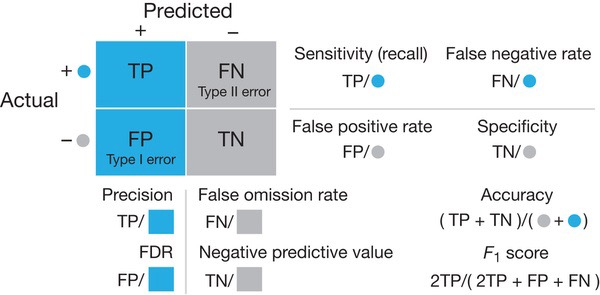

In [60]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [61]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## 2. Algoritmo RandomForest ********************

É um método classificador ensemble (conj de arvores de decisão)

In [66]:
# importar
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Criando e treinando o modelo
modelo_v2 = RandomForestClassifier(random_state = 42) # criar
modelo_v2.fit(X_treino, Y_treino.ravel()) # treinar

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [68]:
# Verificando os dados de treino (OVERFITING)
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [69]:
# Verificando nos dados de teste - IDEAL
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.7403



In [70]:
# imprimir a Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 32 119]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## 3. Regressão Logística ********************

É um algoritmo de classificação 

In [72]:
# importar
from sklearn.linear_model import LogisticRegression

In [74]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000) # criar
modelo_v3.fit(X_treino, Y_treino.ravel()) # treinar 
lr_predict_test = modelo_v3.predict(X_teste) # previsões só com os dados de teste (não faremos com os dados de treino)

In [75]:
# imprimir a Confusion Matrix
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7359

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



In [ ]:
### Resumindo
## Exatidão nos dados de teste

# Modelo usando algoritmo Naive Bayes         = 0.7359
# Modelo usando algoritmo Random Forest       = 0.7403
# Modelo usando algoritmo Regressão Logística = 0.7359

## 4. Algoritmo Árvore de Decisão ********************

In [78]:
#  importar
from sklearn.tree import DecisionTreeClassifier

In [79]:
# Quarta versão do modelo usando Árvore de decisão
modelo_v4 = DecisionTreeClassifier(random_state=1) # criar
modelo_v4.fit(X_treino, Y_treino.ravel()) # treinar 
dt_predict_test = modelo_v4.predict(X_teste) # previsões só com os dados de teste (não faremos com os dados de treino)

In [82]:
# imprimir a Confusion Matrix
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, dt_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, dt_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7316

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.64      0.62        80
           0       0.80      0.78      0.79       151

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



## 5. Algoritmo Rede MLP

In [85]:
# importar o MLP-Perceptron multicamada
from sklearn.neural_network import MLPClassifier

In [86]:
# Quinta versão do modelo usando MLP
modelo_v5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 5), random_state=1) # criar (rede com escondidas com 5 neurônios cada)
modelo_v5.fit(X_treino, Y_treino.ravel()) # treinar 
mlp_predict_test = modelo_v5.predict(X_teste) # previsões só com os dados de teste (não faremos com os dados de treino)

In [87]:
# imprimir a Confusion Matrix
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, mlp_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, mlp_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.4502

Classification Report
              precision    recall  f1-score   support

           1       0.30      0.45      0.36        80
           0       0.61      0.45      0.52       151

    accuracy                           0.45       231
   macro avg       0.45      0.45      0.44       231
weighted avg       0.50      0.45      0.46       231



OBS

Aprendizagem supervisionada - 2 categorias:
- classificação: para fazer previsão de classes/categorias.
- regressão: para fazer a previsão de valores numéricos.
      Regressão: 
                Linear simples
                Múltipla
                Read
                Laço


## Fazer previsões com o modelo treinado

In [88]:
# importar o pacote para savar o modelo treinado - nesse caso será o modelo 3 : Regressão Logística
import pickle

In [89]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [90]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [91]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]


** Fazer o deploy

## Fim